# Day 17 In-Class Assignment: Monte-Carlo Methods

### <p style="text-align: right;"> &#9989; Cesarine Graham</p>


#### <p style="text-align: right;"> &#9989; Allison Perez-Bermudez, Victoria Fallon, Erin Syerson (Group 2)
</p>


## Goals of this assignment

The goals of this assignment are:

* Use Monte-Carlo integration
* Learn how to use Monte-Carlo methods for efficient multidimensional integration
* Learn about importance sampling and understand the example code

## Assignment instructions

Upload the assignment to Gradescope before noon the day of the class.

---
# Part 1: Monte-Carlo Integration

Whereas techniques such as the trapezoidal rule or Gaussian quadrature use a deterministic approach, Monte-Carlo integration simplifies the integration process while introducing random noise, using large numbers of random samples to approximate the actual solution of an integral.

### Task 1.1
Write code in the cell below to do the integral

$$ I = \int_0^1 \frac{dx}{1+x^2} $$

using Monte-Carlo integration, as we learned in the pre-class assignment.
The correct answer should be $\frac{\pi}{4}$.

Run 100 times for each number $N$ of samples, where $N\in\{10, 100, 1000, 10^4, 10^5\}$.
Make a plot of the averaged integral results as a function of $N$.

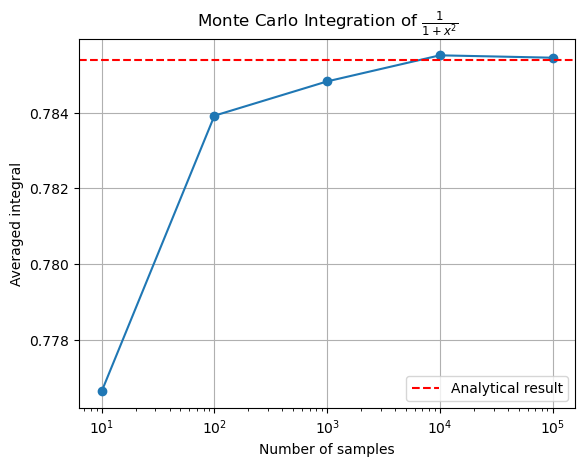

In [28]:
### your code here

import numpy as np
import matplotlib.pyplot as plt

def monte_carlo_integral(N):
    x_values = np.random.uniform(0, 1, N)
    y_values = 1 / (1 + x_values**2)
    integral = np.mean(y_values)
    return integral

Ns = [10, 100, 1000, 10000, 100000]
averaged_integrals = []

for N in Ns:
    integrals = [monte_carlo_integral(N) for _ in range(100)]
    averaged_integral = np.mean(integrals)
    averaged_integrals.append(averaged_integral)

plt.plot(Ns, averaged_integrals, marker='o')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Averaged integral')
plt.title('Monte Carlo Integration of $\\frac{1}{1+x^2}$')
plt.axhline(y=np.pi/4, color='r', linestyle='--', label='Analytical result')
plt.grid()
plt.legend()
plt.show()

### Task 1.2
Now, perform the same integral using an numerical integration we used before, the trapezoidal rule (look up the previous pre-class/in-class code to start with).
Repeat the same integral using $N\in\{10, 100, 1000, 10^4, 10^5\}$ points.
Again, make a plot for the integral results as a function of $N$.

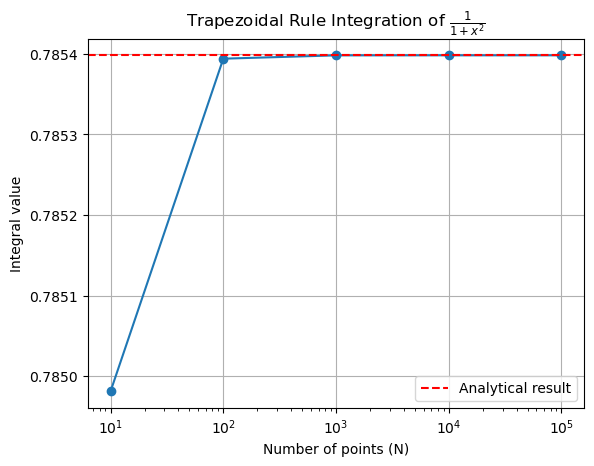

In [14]:
### your code here

import numpy as np
import matplotlib.pyplot as plt

def trapezoidal_rule(f, a, b, N):
    h = (b - a) / N
    x = np.linspace(a, b, N+1)
    y = f(x)
    integral = h * (np.sum(y) - 0.5 * (y[0] + y[-1]))
    return integral

def func(x):
    return 1 / (1 + x**2)

Ns = [10, 100, 1000, 10000, 100000]
integral_results = []

for N in Ns:
    integral = trapezoidal_rule(func, 0, 1, N)
    integral_results.append(integral)

plt.plot(Ns, integral_results, marker='o')
plt.xscale('log')
plt.xlabel('Number of points (N)')
plt.ylabel('Integral value')
plt.title('Trapezoidal Rule Integration of $\\frac{1}{1+x^2}$')
plt.axhline(y=np.pi/4, color='r', linestyle='--', label='Analytical result')
plt.legend()
plt.grid()
plt.show()

### Task 1.3: Integral in many dimensions I
This exercise asks you to estimate the volume of a hypersphere of unit radius in ten dimensions using a Monte-Carlo integration.

Consider the equivalent problem in two dimensions, the area of a circle of unit radius (see [this figure](https://drive.google.com/file/d/1fAuMW6GYsEbRKmmTpO4nUdZB9wgr_0kd/view?usp=sharing))

The area of the circle, the shaded area above, is given by the integral

$$ A = \int_{-1}^{+1}dy\int_{-1}^{+1}dx\, f(x,y), $$

where $f(x,y)=1$ inside the circle and zero elsewhere:

$$
f(x,y) = \biggl\lbrace\begin{array}{ll}
           1 &\quad\text{if }x^2+y^2\le 1, \\
           0 &\quad\text{otherwise.}
         \end{array}
$$

First, you generate a set of $N$ random points $(x,y)$, where both $x$ and $y$ are in the range from $-1$ to 1.
The integral of a function $f(r)$ over a volume $V$ in a high-dimensional space is given by

$$ I \approx {V\over N} \sum_{i=1}^N f(\mathbf{x}_i). $$

The two-dimensional version of for this calculation would be

$$ I \approx {4\over N} \sum_{i=1}^N f(x_i,y_i). $$

In the cell below, write down the code to perform this calculation.

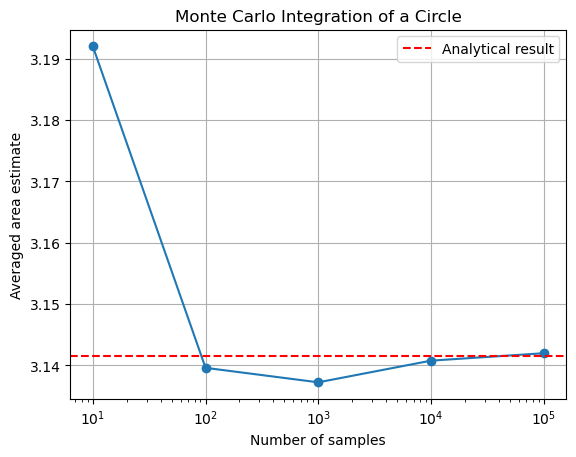

In [30]:
### your code here

def f(x, y):
    return (x**2 + y**2) <= 1

def monte_carlo_circle_area(N):
    x_values = np.random.uniform(-1, 1, N)
    y_values = np.random.uniform(-1, 1, N)
    inside_circle = f(x_values, y_values)
    area_estimate = 4 * np.mean(inside_circle)
    return area_estimate

Ns = [10, 100, 1000, 10000, 100000]
area_estimates = []

for N in Ns:
    areas = [monte_carlo_circle_area(N) for _ in range(100)]
    averaged_area = np.mean(areas)
    area_estimates.append(averaged_area)

plt.plot(Ns, area_estimates, marker='o')
plt.xscale('log')
plt.xlabel('Number of samples')
plt.ylabel('Averaged area estimate')
plt.title('Monte Carlo Integration of a Circle')
plt.axhline(y=np.pi, color='r', linestyle='--', label='Analytical result')
plt.grid()
plt.legend()
plt.show()

### Task 1.4  Integral in many dimensions II

Generalize the above method to the ten-dimensional case and write a program to perform a Monte-Carlo calculation of the volume of a sphere of unit radius in ten dimensions.

If we had to do a ten-dimensional integral the traditional way, it would take a very long time.  
Even with only 100 points along each axis (which wouldn't give a very accurate result) we'd still have $100^{10} = 10^{20}$ points to sample, which is impossible on any computer.
However, using Monte-Carlo method, we can get a pretty good result with just a million points or so.

Feel free to test this after the class.

In [31]:
### your code here

def f(*args):
    return sum(x**2 for x in args) <= 1

def monte_carlo_hypersphere_volume(N):
    points = np.random.uniform(-1, 1, size=(N, 10))
    inside_hypersphere = np.array([f(*point) for point in points])
    volume_estimate = 2**10 * np.mean(inside_hypersphere)
    return volume_estimate

N = 1000000
volume_estimate = monte_carlo_hypersphere_volume(N)
print("Volume estimate of the 10-dimensional unit hypersphere:", volume_estimate)

Volume estimate of the 10-dimensional unit hypersphere: 2.56512


------------
# Part 2: Improved Monte-Carlo Integration

We have presented a simple brute-force approach to integration with Monte Carlo.
We sampled over a given number of points distributed uniformly over a domain.

Here, we introduce two important ideas, which in most cases improve upon the brute-force approach with uniform distribution:
* Change of variables
* Importance sampling

## Change of Variables
Start from the uniform distribution:

$$
p(x)\,dx=\left\{\begin{array}{cc} dx & \quad \text{if } 0 \le x \le 1\\
                                0  & \text{otherwise}\end{array}\right.
$$

with $p(x)=1$ and satisfying $\int_{-\infty}^{\infty}dx\,p(x)dx=1$.

When we attempt a transformation to a new variable $x\rightarrow y$, we need to conserve the probability

$$ p(y)\,dy=p(x)dx, $$

which for the uniform distribution within its nonzero range implies

$$
p(y)\,dy=dx.
$$

Let us assume that $p(y)$ is a PDF different from the uniform PDF $p(x)=1$ with $x \in [0,1]$.
If we integrate the last expression we arrive at

$$
x(y)=\int_0^y dy'\,p\left(y'\right),
$$

which is nothing but the cumulative distribution of $p(y)$:

$$
x(y) = P(y) = \int_0^y dy'\,p\left(y'\right).
$$

----------------------------------------
## Importance Sampling

With the aid of the above variable transformation we address now one of the most widely used approaches to Monte-Carlo integration, importance sampling.

Let us assume that $p(y)$ is a PDF whose behavior resembles that of a function $F$ defined in a certain interval $[a,b]$. The normalization condition is

$$ \int_a^b dy\,p(y) = 1. $$

We can rewrite our integral as

$$ I =\int_a^b dy\,F(y) =\int_a^b dy\,p(y)\frac{F(y)}{p(y)}. $$

Since random numbers are generated for the uniform distribution $p(x)$
with $x\in [0,1]$, we need to perform a change of variables $x\rightarrow y$
through

$$
x(y)=\int_a^y p\left(y'\right)dy',
$$

where we used

$$
p(x)\,dx=dx=p(y)\,dy.
$$

If we can invert $x(y)$, we find $y(x)$ as well.

With this change of variables we can express the above integral as

$$ I = \int_a^b dy\,p(y)\frac{F(y)}{p(y)} = \int_{\tilde{a}}^{\tilde{b}}dx\frac{F(y(x))}{p(y(x))}, $$

meaning that a Monte-Carlo evaluation of the above integral gives

$$ \int_{\tilde{a}}^{\tilde{b}} dx \frac{F(y(x))}{p(y(x))}
 = \frac{1}{N}\sum_{i=1}^N\frac{F(y(x_i))}{p(y(x_i))}. $$

Note the change in integration limits from $a$ and $b$ to $\tilde{a}$ and $\tilde{b}$.

The advantage of such a change of variables in case $p(y)$ follows $F$ closely is that the integrand becomes smooth, and we can sample over relevant values for the integrand.
It is, however, not trivial to find such a function $p$.
The conditions on $p$ which allow us to perform these transformations are:

  * $p$ is normalizable and positive definite

  * $p$ is analytically integrable

  * The integral is invertible

## Applying importance sampling

Let us look again at the integral

$$ I = \int_0^1 dx\,F(x) = \int_0^1 \frac{dx}{1+x^2} = \frac{\pi}{4}. $$

We choose the following PDF:

$$ p(x) = \frac{1}{3}\left(4-2x\right) \qquad \int_0^1 dx\,p(x)=1, $$

resulting in

$$ \frac{F(0)}{p(0)} = \frac{F(1)}{p(1)} = \frac{3}{4}. $$

Check that this fulfills the requirements of a PDF.

We then perform the change of variables:

$$
y(x) = \int_0^x dx'\,p\left(x'\right) = \frac{1}{3}x\left(4-x\right),
$$

or

$$
x = 2-\left(4-3y\right)^{1/2}
$$

Note also that $y=0 \to x=0$ and $y=1 \to x=1$.

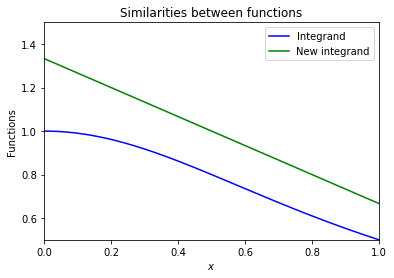

In [ ]:

from  matplotlib import pyplot as plt
from math import exp, acos, log10
import numpy as np

#  function to integrate
def function(x):
    return 1.0/(1+x*x)

#  new probability
def newfunction(x):
    return 0.3333333*(4.0-2*x)

Dim = 1000
x = np.linspace(0.0,1.0,Dim)
f = np.zeros(Dim)
g = np.zeros(Dim)
for i in np.arange(Dim):
    f[i] = function(x[i])
    g[i] = newfunction(x[i])

plt.plot(x, f ,'b-',x, g,'g-')
plt.axis([0,1,0.5, 1.5])
plt.xlabel('$x$')
plt.ylabel('Functions')
plt.title('Similarities between functions')
plt.legend(['Integrand', 'New integrand'], loc='best')
plt.savefig('newprobability.pdf')
plt.show()

------------
## Part 3: Monte-Carlo Integration of Multidimensional Integrals

When we deal with multidimensional integrals of the form

$$
I=\int_{a_1}^{b_1}\!\!dx_1\int_{a_2}^{b_2}\!\!dx_2\cdots \int_{a_d}^{b_d}\!\!dx_d\, g\left(x_1,\ldots,x_d\right),
$$

with $x_i$ defined in the interval $[a_i,b_i]$, we would typically need a transformation of variables of the form

$$ x_i = a_i+\left(b_i-a_i\right)t_i, $$

if we were to use the uniform distribution on the interval $[0,1]$.

In this case, we need a Jacobi determinant

$$ \prod_{i=1}^d \left(b_i-a_i\right), $$

and to convert the function

$$ g\left(x_1,\ldots,x_d\right) \to g\left(a_1+\left(b_1-a_1\right)t_1,\ldots,a_d+\left(b_d-a_d\right)t_d\right). $$

### Example multidimensional integral

As an example, consider the following six-dimensional integral

$$ \int d\mathbf{x}d\mathbf{y}\,g\left(\mathbf{x}, \mathbf{y}\right), $$

where $\mathbf{x}$ and $\mathbf{y}$ are 3-vectors and

$$
g\left(\mathbf{x},\mathbf{y}\right) = \exp{(-\mathbf{x}^2-\mathbf{y}^2)}\left(\mathbf{x}-\mathbf{y}\right)^2
$$

###  Monte-Carlo integration

We can solve this integral by employing our brute-force scheme, or using importance sampling and random variables distributed according to a gaussian PDF.
For the latter, if we set the mean value  $\mu=0$ and the standard deviation  $\sigma=1/\sqrt{2}$, we have

$$ \frac{e^{-x^2}}{\sqrt{\pi}}, $$

and using this normal distribution, we rewrite our integral as

$$ \pi^3\int\prod_{i=1}^6\left(
    \frac{dx_i}{\sqrt{\pi}}e^{-x_i^2}\right)
    (\mathbf{x}-\mathbf{y})^2.
$$

We rewrite it in a more compact form as

$$
\int f(x_1,\dots,x_6)F(x_1,\dots,x_6)\prod_{i=1}^6 dx_i,
$$

where $f$ is the above normal distribution
and

$$
F(x_1,\dots,x_6)=F(\mathbf{x, y})=(\mathbf{x}-\mathbf{y})^2.
$$

### Brute-force code
Below are two codes, one for the brute-force integration and the other employing importance sampling with a gaussian distribution.

In [ ]:
### your code here

The answer is hidden in the box below. Double-click to see it.
<div  style="display: none;">

#Monte Carlo integration in 6 dimensions

import numpy,math
import sys

def integrand(x):
    """Calculates the integrand
    exp(-a*(x1^2+x2^2+...+x6^2)-b*[(x1-x4)^2+...+(x3-x6)^2])
    from the values in the 6-dimensional array x."""
    a = 1.0
    b = 0.5

    x2 = numpy.sum(x**2)
    xy = (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2
    
    return numpy.exp(-a*x2-b*xy)

#Main program

#Integration limits: x[i] in (-5, 5)
L      = 5.0
jacobi = (2*L)**6

N = 100000

#Evaluate the integral
sum  = 0.0
sum2 = 0.0
for i in xrange(N):
    #Generate random coordinates to sample at
    x = numpy.array([-L+2*L*numpy.random.random() for j in xrange(6)])

    fx         = integrand(x)
    sum       += fx
    sum2      += fx**2
#Calculate expt. values for fx and fx^2
sum /=float(N)
sum2/=float(N)

#Result
int_mc  = jacobi*sum;
#Gaussian standard deviation
sigma   = jacobi*math.sqrt((sum2-sum**2)/float(N))

#Output
print "Montecarlo result = %10.8E" % int_mc
print "Sigma             = %10.8E" % sigma
</div>

### Importance Sampling
The second code uses importance sampling and random numbers that follow the normal distribution
the brute force approach

In [ ]:
### your code here

The answer is hidden in the box below. Double-click to see it.
<div  style="display: none;">




#Monte Carlo integration with importance sampling

import numpy,math
import sys

def integrand(x):
    """Calculates the integrand
    exp(-b*[(x1-x4)^2+...+(x3-x6)^2])
    from the values in the 6-dimensional array x."""
    b = 0.5

    xy = (x[0]-x[3])**2 + (x[1]-x[4])**2 + (x[2]-x[5])**2
    return numpy.exp(-b*xy)

#Main program

#Jacobi determinant
jacobi = math.acos(-1.0)**3
sqrt2  = 1.0/math.sqrt(2)

N = 100000

#Evaluate the integral
sum  = 0.0
sum2 = 0.0
for i in xrange(N):
    #Generate random, gaussian distributed coordinates to sample at
    x = numpy.array([numpy.random.normal()*sqrt2 for j in xrange(6)])

    fx         = integrand(x)
    sum       += fx
    sum2      += fx**2
#Calculate expt. values for fx and fx^2
sum /=float(N)
sum2/=float(N)

#Result
int_mc  = jacobi*sum;
#Gaussian standard deviation
sigma   = jacobi*math.sqrt((sum2-sum**2)/float(N))

#Output
print "Montecarlo result = %10.8E" % int_mc
print "Sigma             = %10.8E" % sigma
</div>

&#169; Copyright 2024,  Michigan State University Board of Trustees